In [7]:
from utils import get_model_and_hyperparams, get_dataset_path, load_p2s_dataset, vae_encoding, plot_ts_with_encoding
from gsppy.gsp import GSP
from aeon.datasets import load_from_tsv_file
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def find_sequence_in_pattern(sequence, pattern):
    """
    Locate indices in the sequence that match the non-contiguous pattern.

    Parameters:
        sequence (list): The main sequence to search in.
        pattern (list): The pattern to match.

    Returns:
        list: List of indices in the sequence that match the pattern.
              Returns an empty list if no match is found.
    """
    indices = []
    seq_idx = 0  # Pointer for the sequence

    # Iterate through the pattern
    for pat_item in pattern:
        # Search for the current pattern item in the sequence from the current pointer
        while seq_idx < len(sequence) and sequence[seq_idx] != pat_item:
            seq_idx += 1
        
        # If the item is found, save the index
        if seq_idx < len(sequence):
            indices.append(seq_idx)
            seq_idx += 1  # Move to the next position in the sequence
        else:
            # Pattern item not found, return an empty list
            return []

    return indices

def get_dataset(dataset: str):
    # Load datasets
    if dataset == "p2s":
        X_train, y_train = load_p2s_dataset("train")
        X_test, y_test = load_p2s_dataset("test")
    else:
        X_train, y_train = load_from_tsv_file(get_dataset_path(dataset, "train"))
        X_test, y_test = load_from_tsv_file(get_dataset_path(dataset, "test"))

    X_train = X_train.squeeze()
    X_test = X_test.squeeze()

    return X_train, y_train, X_test, y_test

In [9]:
model_name = "Wine_p16_a32"
dataset = "Plane"

vae, params = get_model_and_hyperparams(model_name)
X_train, y_train, _, _ = get_dataset(dataset)
X_train_vae = vae_encoding(vae, X_train, params.patch_len)
classes = np.unique(y_train)

In [10]:
min_support = 0.5   # fraction of ts containing the sequence

for c in classes:
    filtered_time_series = X_train_vae[y_train == c]
    filtered_time_series = filtered_time_series.tolist()
    result = GSP(filtered_time_series).search(min_support)
    print(f"class: {c}")
    print(result)


class: 1
[{(19,): 15, (20,): 15, (29,): 14, (8,): 15, (25,): 10, (30,): 15, (0,): 11}, {(19, 20): 15, (20, 25): 8, (29, 30): 14, (30, 8): 15}, {(19, 20, 25): 8, (29, 30, 8): 14}]
class: 2
[{(19,): 14, (20,): 14, (29,): 14, (0,): 10, (8,): 14, (25,): 12, (30,): 12}, {(19, 20): 14, (20, 25): 12, (29, 0): 7, (29, 8): 11, (0, 30): 8, (25, 29): 10, (30, 8): 12}, {(19, 20, 25): 12, (20, 25, 29): 10, (0, 30, 8): 8, (25, 29, 8): 10}, {(19, 20, 25, 29): 10, (20, 25, 29, 8): 10}, {(19, 20, 25, 29, 8): 10}]
class: 3
[{(19,): 9, (20,): 9, (4,): 9, (29,): 8, (30,): 9, (25,): 8, (0,): 8, (8,): 7}, {(19, 20): 9, (20, 25): 8, (4, 29): 7, (29, 30): 6, (30, 8): 7, (25, 0): 8, (0, 4): 5}, {(19, 20, 25): 8, (20, 25, 0): 8, (4, 29, 30): 6, (29, 30, 8): 6}, {(19, 20, 25, 0): 8, (4, 29, 30, 8): 6}]
class: 4
[{(19,): 16, (25,): 14, (29,): 16, (14,): 16, (0,): 14, (8,): 16}, {(19, 25): 14, (19, 14): 9, (25, 19): 8, (29, 14): 13, (29, 8): 16, (14, 29): 16, (14, 0): 11, (0, 29): 9}, {(19, 25, 19): 8, (19, 14, 0)

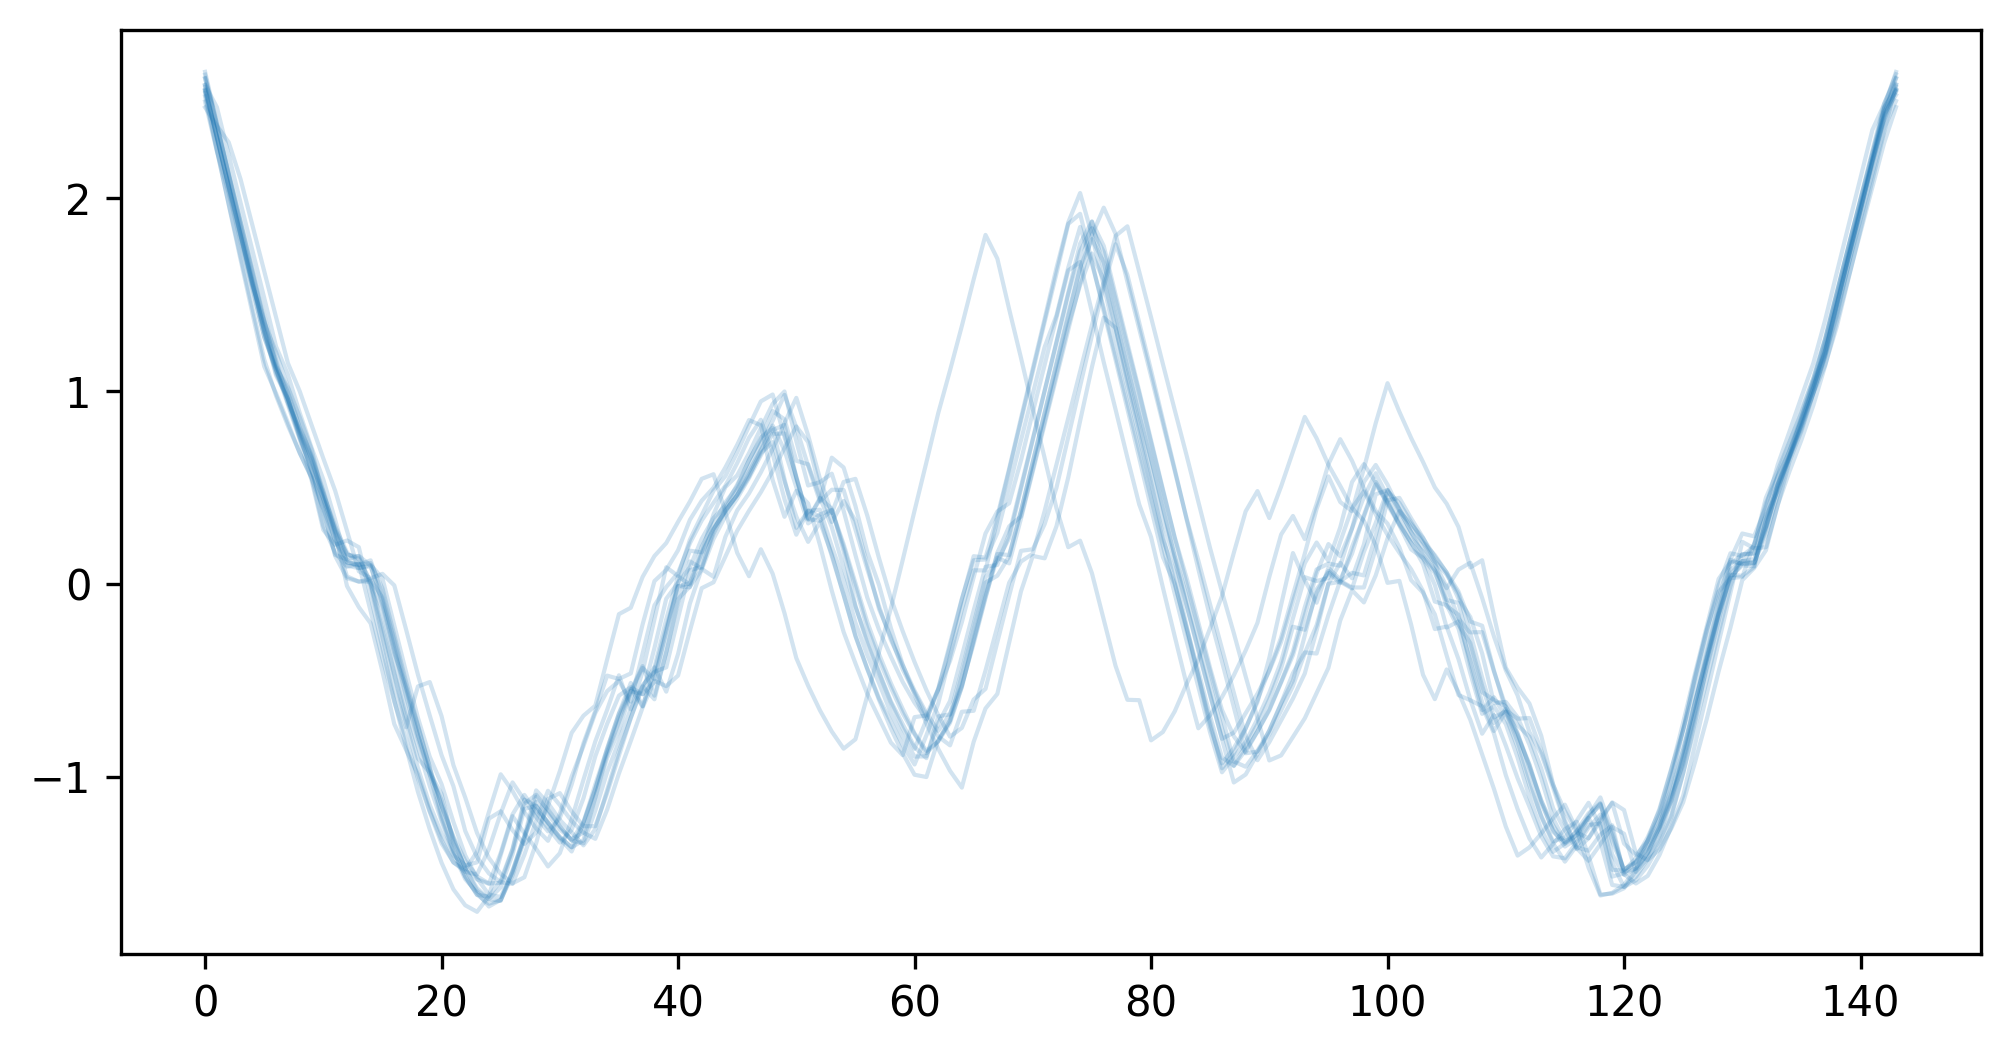

In [11]:
#for c in classes:
c = classes[1]
filtered_ts = X_train[y_train == c]
filtered_ts_sym = X_train_vae[y_train == c]

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches((8, 4))

for i in range(filtered_ts.shape[0]):
    ax.plot(filtered_ts[i], color='tab:blue', alpha=0.2, linewidth=1)

In [12]:
pattern = [19, 20, 25, 29, 8]

In [39]:
pattern

[19, 20, 25, 29, 8]

In [38]:
X_train_vae

array([[19, 20, 14, 29,  8, 25, 29, 30,  8],
       [19, 25, 29, 14,  0,  0, 14, 29,  8],
       [19, 20,  0, 23, 18,  0, 18, 30,  8],
       [29, 25, 18,  8, 19, 25,  1, 14,  4],
       [19, 20, 14, 29, 14, 21,  0, 20,  8],
       [19, 20, 21, 14, 29,  0, 21, 30,  8],
       [19, 20, 21, 14, 29,  0,  0, 30,  8],
       [19, 20, 14,  0, 28, 18, 29, 30,  8],
       [19, 20, 25, 29,  8, 18,  0, 30,  8],
       [19, 30, 29, 23, 21,  0,  0, 30, 16],
       [19, 20,  0, 23, 18,  0,  0, 30,  8],
       [19, 20, 29, 14,  0,  0, 25, 30, 16],
       [19, 20, 21, 14, 29,  0, 18, 30,  8],
       [19, 20,  1, 14, 29,  0, 25, 30, 16],
       [19, 25, 19, 14,  0, 29, 14, 29,  8],
       [19, 20,  0, 23, 25,  0,  0, 30,  8],
       [19, 20, 25, 29,  8, 29, 29, 30,  8],
       [19, 25, 29, 25,  0, 29, 14, 29,  8],
       [19, 30, 19, 14,  0,  0, 14, 29,  8],
       [19, 30, 29, 14, 29,  0, 25, 30, 16],
       [19, 20, 29, 23, 20,  0, 25, 30,  8],
       [19, 20,  0, 23, 18,  0,  0, 30, 16],
       [19

In [18]:
found_idx = [find_sequence_in_pattern(seq, pattern) for seq in X_train_vae if find_sequence_in_pattern(seq, pattern)]
found_idx

[[0, 1, 5, 6, 8],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 5, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 4, 8],
 [0, 1, 2, 4, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 6, 8],
 [0, 1, 5, 6, 8],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 6, 8],
 [0, 1, 2, 3, 4]]

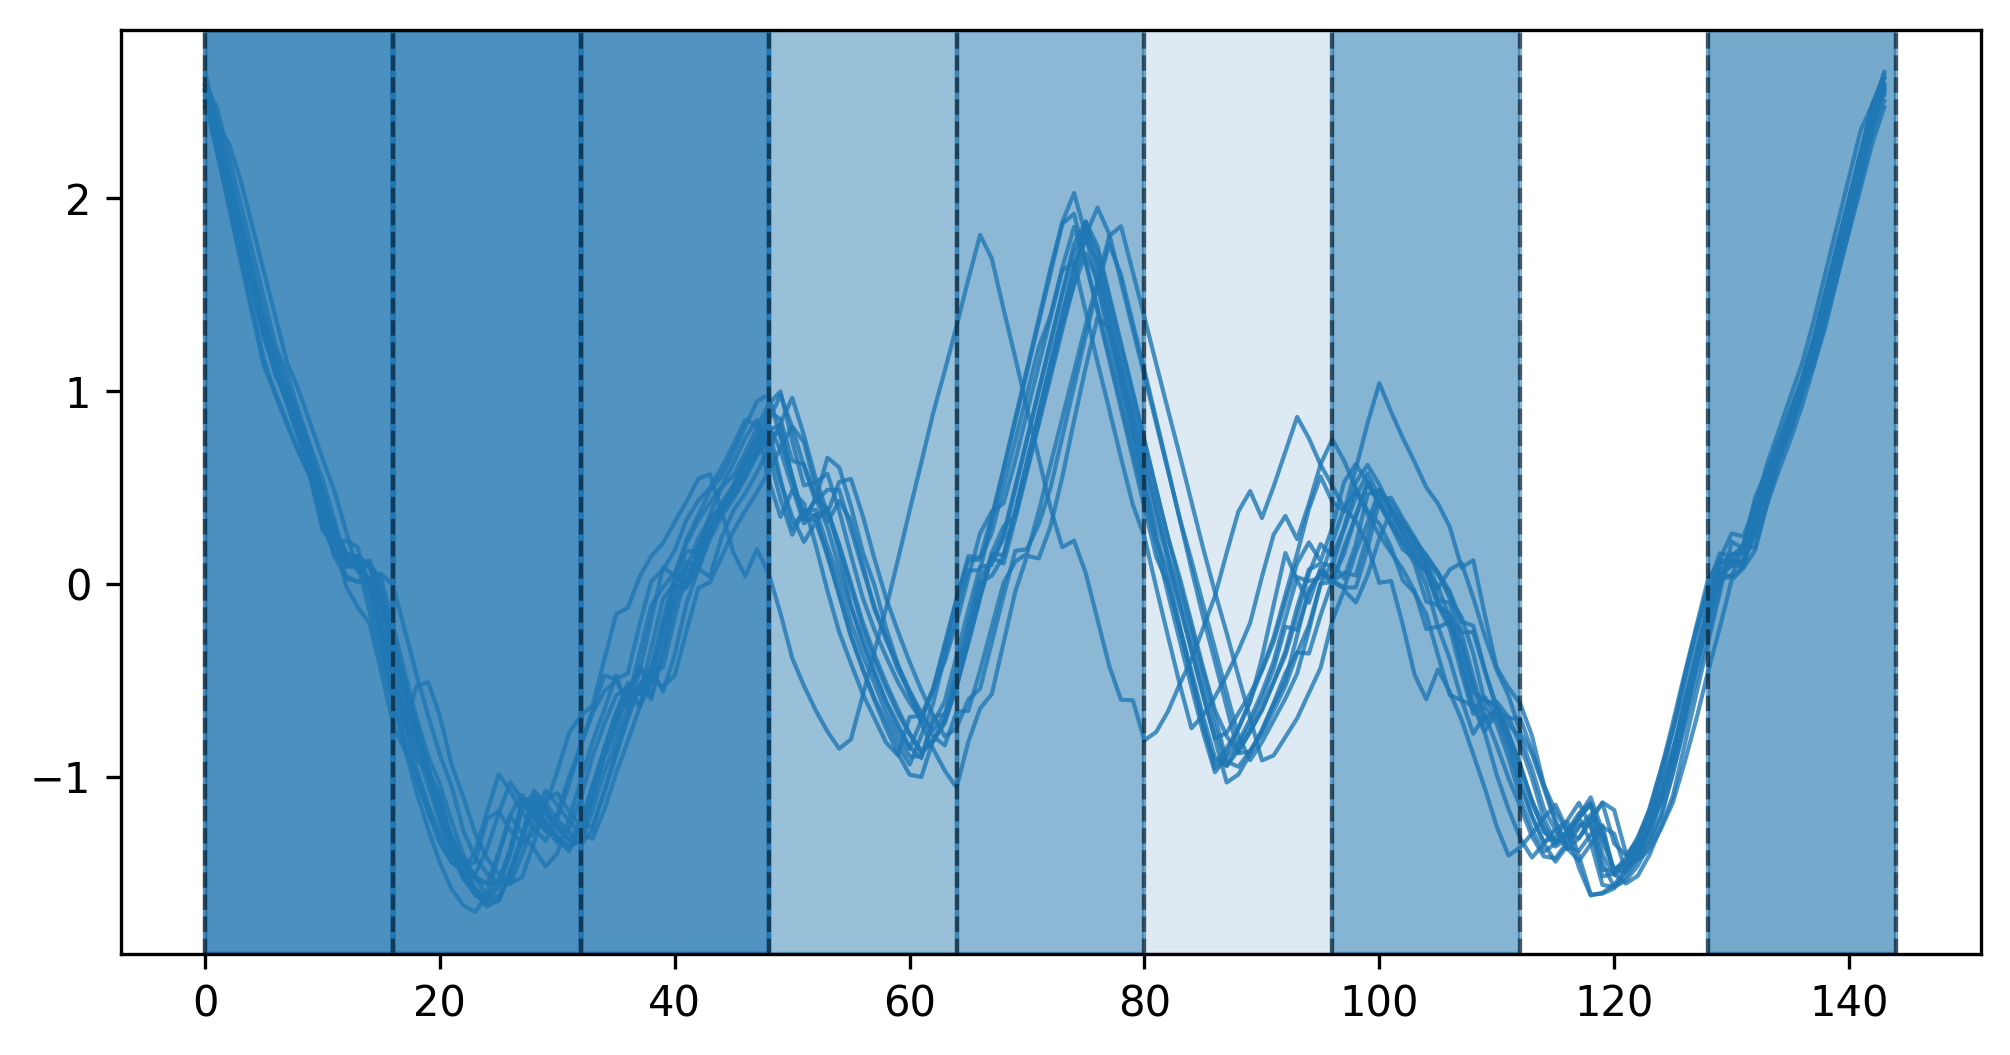

In [37]:
seg_len = params.patch_len
enc_len = params.n_latent

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches((8, 4))

for i in range(filtered_ts.shape[0]):
    ax.plot(filtered_ts[i], color='tab:blue', alpha=0.8, linewidth=1)

x_points = [i * seg_len for i in range((X_train.shape[1] // seg_len) + 1)]

for x in x_points:
    ax.axvline(x, color="k", linestyle="dashed", alpha=0.5, linewidth=1)

for idx in found_idx:
    for x in idx:
        plt.axvspan(x_points[x], x_points[x+1], color='tab:blue', alpha=0.05)